In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from agents.actor_critic import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import gym
import matplotlib.pyplot as plt
import torch

In [2]:
env = gym.make('CartPole-v1')

In [3]:
actor_model = Actor(
    state_dim=env.observation_space.shape[0],
    action_dim=env.action_space.n,
)
critic_model = Critic(state_dim=env.observation_space.shape[0])
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=env.action_space.n,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.995,
    },
    log_freq=300,
)

In [4]:
a2c.run(2000)

Episode: 0, Loss: 0.8691979050636292, Avg. Reward: 16.0
Episode: 300, Loss: 0.4741671085357666, Avg. Reward: 95.0
Episode: 600, Loss: 0.26031649112701416, Avg. Reward: 265.0
Episode: 900, Loss: 0.7604548931121826, Avg. Reward: 500.0
Episode: 1200, Loss: 0.3214367926120758, Avg. Reward: 371.0
Episode: 1500, Loss: 0.5843729972839355, Avg. Reward: 500.0
Episode: 1800, Loss: 0.7013439536094666, Avg. Reward: 500.0


In [5]:
a2c.evaluate()

# Training

Text(0.5, 1.0, 'Average reward per episode')

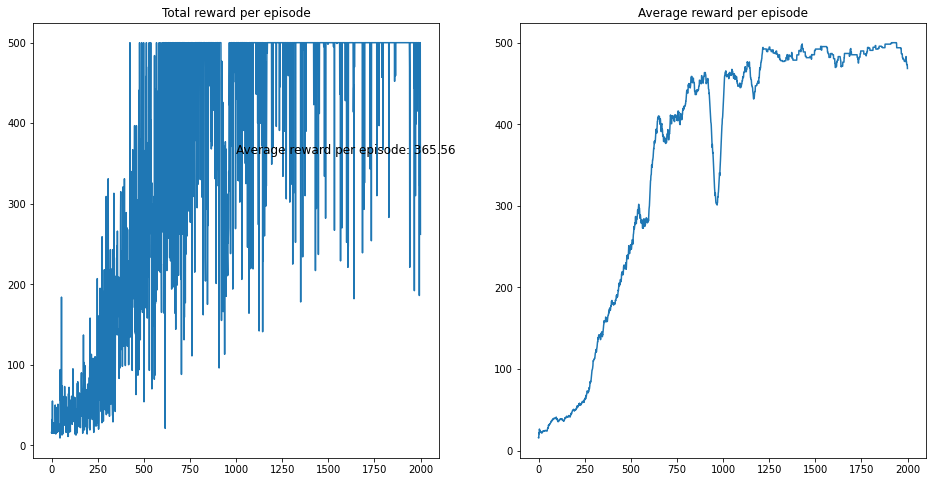

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in a2c.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(2000), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

cumulative_rewards = [log['avg_reward'] for _, log in a2c.logs.items()]
ax[1].plot(range(2000), cumulative_rewards)
ax[1].set_title('Average reward per episode')

# Evaluation

Text(0.5, 1.0, 'Total reward per episode')

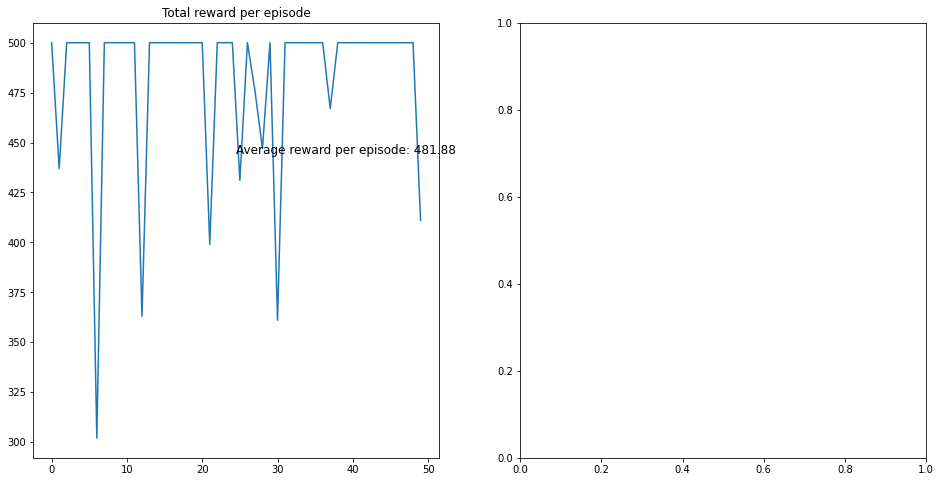

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in a2c.eval_logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(50), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

# cumulative_rewards = [log['avg_reward'] for _, log in a2c.eval_logs.items()]
# ax[1].plot(range(50), cumulative_rewards)
# ax[1].set_title('Average reward per episode')